In [4]:
import nilearn.datasets
import nibabel as nib
import numpy as np
import os
from nilearn.surface import load_surf_data
from nilearn.plotting import plot_glass_brain
from nilearn.plotting import plot_surf_stat_map, plot_surf_roi
from nilearn.regions import ReNA

from Neuro_Plotting.Ref import SurfRef, VolRef, load_mapping, save_mapping
from Neuro_Plotting.Plot import Plot_Surf, Plot_Surf_Collage, Plot_SurfVol_Collage
import matplotlib.pyplot as plt

In [5]:
def plot(parcel):
    
    data_dr = '/home/sage/Neuro_Plotting/data/'
    surf_ref = SurfRef(data_dr, space='32k_fs_LR')
    atlas = np.load('../parcels/' + parcel + '.npy')
    
    if len(atlas.shape) == 1: 

        data = [atlas[:32492], atlas[:32492:]]
    
        figure, axes, smf = Plot_Surf_Collage(data = data,
                                              ref = surf_ref,
                                              surf_mesh = 'very_inflated',
                                              bg_map = 'sulc_conte',
                                              view = 'standard',
                                              cmap = 'cold_hot',
                                              title = parcel,
                                              title_sz = 22,
                                              threshold = .0001,
                                              avg_method = 'median',
                                              bg_on_data = True,
                                              alpha = 1,
                                              darkness=.5,
                                              colorbar = True,
                                              symmetric_cbar=False)
        
        plt.show()
        
    else:
        for i in range(atlas.shape[1]):
            data = [atlas[:32492, i], atlas[:32492:, i]]
            
            figure, axes, smf = Plot_Surf_Collage(data = data,
                                                  ref = surf_ref,
                                                  surf_mesh = 'very_inflated',
                                                  bg_map = 'sulc_conte',
                                                  view = 'standard',
                                                  cmap = 'cold_hot',
                                                  title = parcel + '_' + str(i),
                                                  title_sz = 22,
                                                  threshold = .0001,
                                                  avg_method = 'median',
                                                  bg_on_data = True,
                                                  alpha = 1,
                                                  darkness=.5,
                                                  colorbar = True,
                                                  symmetric_cbar=False)
            
            plt.show()

        
    


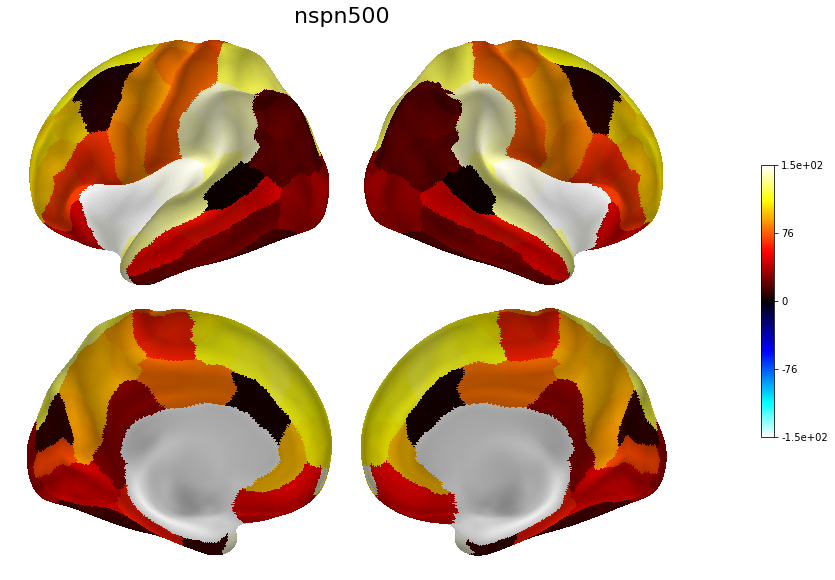

In [6]:
plot('nspn500')

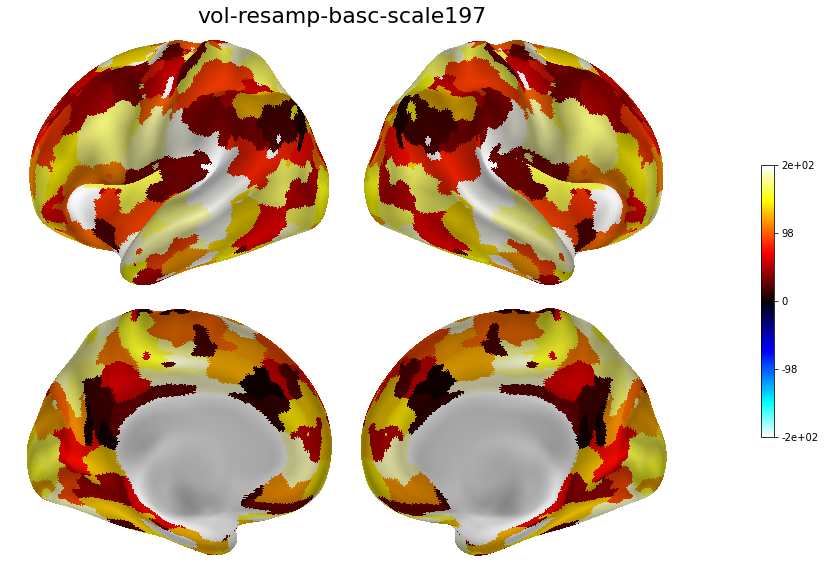

In [9]:
plot('vol-resamp-basc-scale197')

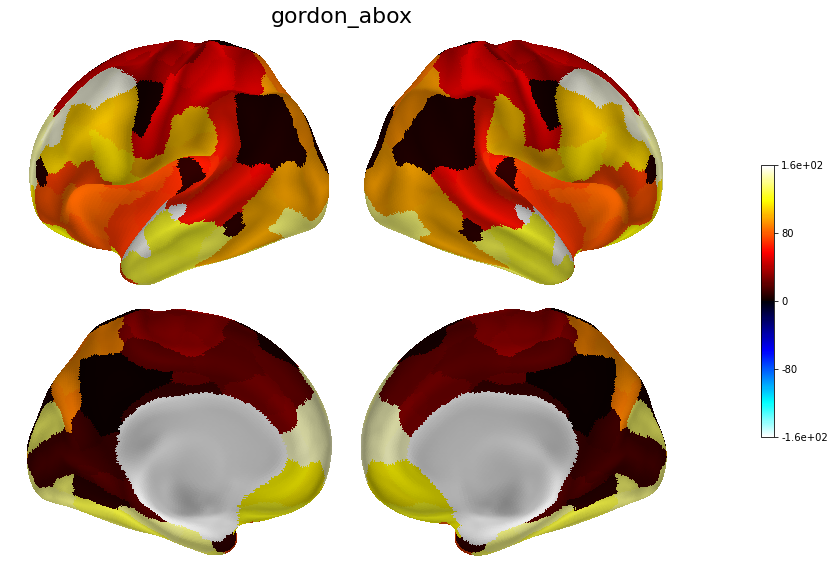

In [11]:
plot('gordon_abox')

In [ ]:
-- Coordinates --
nilearn.datasets.fetch_atlas_msdl
nilearn.datasets.fetch_coords_power_2011
nilearn.datasets.fetch_coords_seitzman_2018
nilearn.datasets.fetch_coords_dosenbach_2010

from nilearn.input_data import NiftiSpheresMasker

Base resampling w/ commands from THomasYero

Using commands from:

https://wiki.humanconnectome.org/download/attachments/63078513/Resampling-FreeSurfer-HCP.pdf

In [ ]:
dr = '/home/sage/Neuroimaging_Pattern_Masks/Atlases_and_parcellations'
loc = os.path.join(dr, '2013_Shen_Constable_NIMG_268_parcellation/shen_1mm_268_parcellation.nii.gz')
shen = vol_labels_to_surf(nib.load(loc))

In [ ]:
plot_surf_roi('/home/sage/CBIG/data/templates/surface/fs_LR_32k/fsaverage.L.pial_orig.32k_fs_LR.surf.gii',
              shen[:64984//2], view='medial')

In [ ]:
plot_surf_roi('/home/sage/CBIG/data/templates/surface/fs_LR_32k/fsaverage.L.pial_orig.32k_fs_LR.surf.gii',
              shen[:64984//2])

In [ ]:
plot_surf_stat_map('/home/sage/CBIG/data/templates/surface/fs_LR_32k/fsaverage.L.pial_orig.32k_fs_LR.surf.gii',
                   test[:64984//2, 10], view='medial')

In [ ]:
harvard = nilearn.datasets.fetch_atlas_harvard_oxford('cort-maxprob-thr0-2mm')
vol = nib.load(harvard['maps'])
plot_glass_brain(vol)


arg_max_surf = vol_labels_to_surf(vol)

plot_surf_roi('/home/sage/CBIG/data/templates/surface/fs_LR_32k/fsaverage.L.pial_orig.32k_fs_LR.surf.gii',
              arg_max_surf[:64984//2], hemi='left', view='medial')

In [ ]:
smith = nilearn.datasets.fetch_atlas_smith_2009()
raw = nib.load(smith['bm20'])
ex = raw.get_fdata()[:,:,:,0]
vol = nib.Nifti1Image(ex, raw.affine)

plot_glass_brain(vol)

lh, rh = volume_to_surf(vol)

plot_surf_stat_map('/home/sage/CBIG/data/templates/surface/fs_LR_32k/fsaverage.L.pial_orig.32k_fs_LR.surf.gii', lh, hemi='left')
plot_surf_stat_map('/home/sage/CBIG/data/templates/surface/fs_LR_32k/fsaverage.R.pial_orig.32k_fs_LR.surf.gii', rh, hemi='right')

6